<a href="https://colab.research.google.com/github/rollmark/AiLearning/blob/master/ch2_%E8%AE%A1%E7%AE%97%E6%9C%BA%E8%A7%86%E8%A7%89%E4%BB%8B%E7%BB%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

## 1.使用Flatten打平数据，最简单模型
## 2.对图像数据、255.0，normalization，对比训练时间和训练效果
## 3.添加更多的units
## 4.添加更多的layers

## 5.使用callback

In [8]:
fashion_dataset = keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_dataset.load_data()

In [3]:
len(train_images),len(test_images)

(60000, 10000)

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels.shape

(60000,)

In [6]:
train_labels[0]

9

In [7]:
### show image


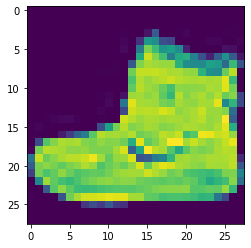

In [7]:
plt.imshow(train_images[0])

In [8]:
### 最简单模型


model_1 = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(units=128, activation='relu'),
  keras.layers.Dense(units=10, activation='softmax')              
])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [10]:
## layer 2: 28*28*128 + 128
## layers 3: 128*10 + 10

100480

In [15]:
%%time
model_1.compile(optimizer=tf.optimizers.Adam(),
                loss=tf.losses.sparse_categorical_crossentropy,
                metrics = ['accuracy'])
history_1 = model_1.fit(train_images, train_labels, epochs=10,
            validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3995 - accuracy: 0.8690 - val_loss: 0.6457 - val_accuracy: 0.8319
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3869 - accuracy: 0.8717 - val_loss: 0.6252 - val_accuracy: 0.8434
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4135 - accuracy: 0.8662 - val_loss: 0.6081 - val_accuracy: 0.8356
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4044 - accuracy: 0.8668 - val_loss: 0.6293 - val_accuracy: 0.8464
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3990 - accuracy: 0.8677 - val_loss: 0.6377 - val_accuracy: 0.8347
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3875 - accuracy: 0.8710 - val_loss: 0.6490 - val_accuracy: 0.8401
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4072 - accuracy: 0.8679 - val_loss: 0.7332 - val_accuracy:

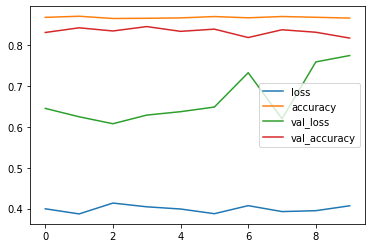

In [17]:
pd.DataFrame(history_1.history).plot()

In [18]:
## model_2: data norm


model_2 = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(units=128, activation='relu'),
  keras.layers.Dense(units=10, activation='softmax')              
])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [4]:
train_images = train_images/255.0
test_images = test_images/255.0


In [20]:
%%time
model_2.compile(optimizer=tf.optimizers.Adam(),
                loss=tf.losses.sparse_categorical_crossentropy,
                metrics = ['accuracy'])
history_2 = model_2.fit(train_images, train_labels, epochs=10,
            validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4959 - accuracy: 0.8238 - val_loss: 0.4243 - val_accuracy: 0.8471
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3731 - accuracy: 0.8651 - val_loss: 0.3828 - val_accuracy: 0.8612
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3348 - accuracy: 0.8770 - val_loss: 0.3744 - val_accuracy: 0.8615
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3098 - accuracy: 0.8864 - val_loss: 0.3478 - val_accuracy: 0.8733
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2931 - accuracy: 0.8921 - val_loss: 0.3559 - val_accuracy: 0.8725
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2793 - accuracy: 0.8960 - val_loss: 0.3530 - val_accuracy: 0.8730
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2665 - accuracy: 0.9012 - val_loss: 0.3445 - val_accuracy:

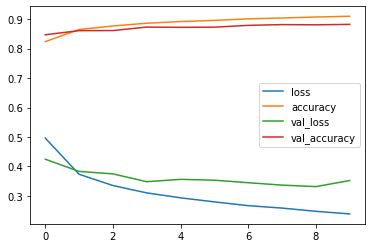

In [21]:
pd.DataFrame(history_2.history).plot()

In [31]:
## model_2 better than model_1: train times, accuracy
test_images[0].shape

(28, 28)

In [34]:
import numpy as np
print(test_labels[0])
predicts = model_2.predict(test_images)

9


In [35]:
predicts[0]

array([5.77076886e-10, 1.04522710e-11, 6.19841747e-11, 8.99608721e-11,
       1.19310195e-11, 1.36204299e-05, 8.76985240e-09, 1.20411981e-02,
       1.86531546e-09, 9.87945199e-01], dtype=float32)

In [36]:
np.argmax(predicts[0])

9

In [37]:
### auto stop train to avoid over-fit
class AutoStopCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('loss') <0.4:
      print("Loss is lower than 0.4, so stop training")
      self.model.stop_training = True
callback_2 = AutoStopCallback()
history_2 = model_2.fit(train_images, train_labels, epochs=10,
            validation_data=(test_images, test_labels),
            callbacks=[callback_2])

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2299 - accuracy: 0.9143 - val_loss: 0.3493 - val_accuracy: 0.8831


In [38]:
## model_3 add more units


model_3 = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(units=512, activation='relu'),
  keras.layers.Dense(units=10, activation='softmax')              
])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [41]:
%%time
model_3.compile(optimizer=tf.optimizers.Adam(),
                loss=tf.losses.sparse_categorical_crossentropy,
                metrics = ['accuracy'])
history_3 = model_3.fit(train_images, train_labels, epochs=10,
            validation_data=(test_images, test_labels),verbose= 2)

Epoch 1/10
1875/1875 - 4s - loss: 0.3257 - accuracy: 0.8806 - val_loss: 0.3630 - val_accuracy: 0.8664 - 4s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.2959 - accuracy: 0.8918 - val_loss: 0.3400 - val_accuracy: 0.8756 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.2798 - accuracy: 0.8967 - val_loss: 0.3422 - val_accuracy: 0.8779 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 5s - loss: 0.2660 - accuracy: 0.9024 - val_loss: 0.3596 - val_accuracy: 0.8735 - 5s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.2530 - accuracy: 0.9061 - val_loss: 0.3453 - val_accuracy: 0.8829 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.2418 - accuracy: 0.9096 - val_loss: 0.3493 - val_accuracy: 0.8786 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.2327 - accuracy: 0.9127 - val_loss: 0.3345 - val_accuracy: 0.8872 - 5s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.2214 - accuracy: 0.9165 - val_loss: 0.3278 - val_accuracy: 0.8888 - 4s/epoch - 2ms/step
Epoch 9/

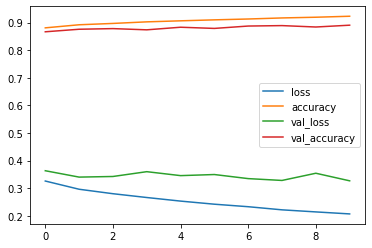

In [42]:
pd.DataFrame(history_3.history).plot()

In [43]:
## add more layers


model_4 = keras.Sequential([
  keras.layers.Flatten(input_shape=(28,28)),
  keras.layers.Dense(units=512, activation='relu'),
  keras.layers.Dense(units=128, activation='relu'),
  keras.layers.Dense(units=10, activation='softmax')              
])

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 128)               65664     
                                                                 
 dense_8 (Dense)             (None, 10)                1290      
                                                                 
Total params: 468,874
Trainable params: 468,874
Non-trainable params: 0
_________________________________________________________________


In [46]:
%%time
model_4.compile(optimizer=tf.optimizers.Adam(),
                loss=tf.losses.sparse_categorical_crossentropy,
                metrics = ['accuracy'])
history_4 = model_4.fit(train_images, train_labels, epochs=10,
            validation_data=(test_images, test_labels),verbose=2)

Epoch 1/10
1875/1875 - 5s - loss: 0.2150 - accuracy: 0.9170 - val_loss: 0.3377 - val_accuracy: 0.8892 - 5s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.2044 - accuracy: 0.9220 - val_loss: 0.3790 - val_accuracy: 0.8841 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.1998 - accuracy: 0.9244 - val_loss: 0.3570 - val_accuracy: 0.8855 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.1917 - accuracy: 0.9276 - val_loss: 0.3676 - val_accuracy: 0.8909 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.1832 - accuracy: 0.9292 - val_loss: 0.3470 - val_accuracy: 0.8939 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.1805 - accuracy: 0.9301 - val_loss: 0.3777 - val_accuracy: 0.8866 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.1738 - accuracy: 0.9333 - val_loss: 0.4029 - val_accuracy: 0.8862 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.1700 - accuracy: 0.9356 - val_loss: 0.3640 - val_accuracy: 0.8945 - 4s/epoch - 2ms/step
Epoch 9/

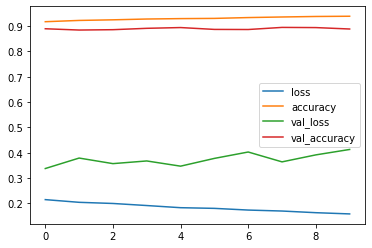

In [47]:
pd.DataFrame(history_4.history).plot()

## 使用卷积神经网络


In [1]:
model_5 = keras.Sequential([
  #keras.layers.Rescaling(1./255, input_shape=(28,28, 1)),                          
  keras.layers.Conv2D(64,(3,3),padding='same',input_shape=(28,28, 1), activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model_5.summary()

NameError: ignored

In [53]:
%%time
model_5.compile(optimizer=tf.optimizers.Adam(),
                loss=tf.losses.sparse_categorical_crossentropy,
                metrics = ['accuracy'])
history_5 = model_5.fit(train_images, train_labels, epochs=10,
            validation_data=(test_images, test_labels),verbose=2)

Epoch 1/10
1875/1875 - 16s - loss: 0.3775 - accuracy: 0.8635 - val_loss: 0.2958 - val_accuracy: 0.8915 - 16s/epoch - 8ms/step
Epoch 2/10
1875/1875 - 5s - loss: 0.2439 - accuracy: 0.9100 - val_loss: 0.2516 - val_accuracy: 0.9084 - 5s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 6s - loss: 0.1989 - accuracy: 0.9267 - val_loss: 0.2250 - val_accuracy: 0.9173 - 6s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 6s - loss: 0.1626 - accuracy: 0.9389 - val_loss: 0.2492 - val_accuracy: 0.9131 - 6s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 6s - loss: 0.1319 - accuracy: 0.9512 - val_loss: 0.2329 - val_accuracy: 0.9219 - 6s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 6s - loss: 0.1061 - accuracy: 0.9604 - val_loss: 0.2443 - val_accuracy: 0.9216 - 6s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 5s - loss: 0.0869 - accuracy: 0.9674 - val_loss: 0.2811 - val_accuracy: 0.9135 - 5s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 6s - loss: 0.0711 - accuracy: 0.9732 - val_loss: 0.2982 - val_accuracy: 0.9219 - 6s/epoch - 3ms/step
Epoch 

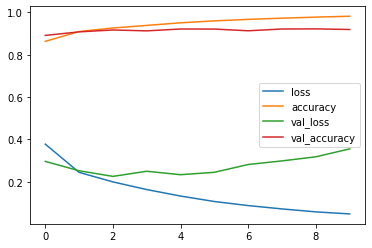

In [54]:
pd.DataFrame(history_5.history).plot()

# 使用dropout

In [5]:

model_6 = keras.Sequential([
  #keras.layers.Rescaling(1./255, input_shape=(28,28, 1)),                          
  keras.layers.Conv2D(64,(3,3),padding='same',input_shape=(28,28, 1), activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.5),
  keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.5),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0

Epoch 1/10
1875/1875 - 18s - loss: 0.4608 - accuracy: 0.8310 - val_loss: 0.3403 - val_accuracy: 0.8812 - 18s/epoch - 10ms/step
Epoch 2/10
1875/1875 - 6s - loss: 0.3195 - accuracy: 0.8821 - val_loss: 0.2882 - val_accuracy: 0.8961 - 6s/epoch - 3ms/step
Epoch 3/10
1875/1875 - 6s - loss: 0.2816 - accuracy: 0.8947 - val_loss: 0.2662 - val_accuracy: 0.9036 - 6s/epoch - 3ms/step
Epoch 4/10
1875/1875 - 6s - loss: 0.2600 - accuracy: 0.9035 - val_loss: 0.2619 - val_accuracy: 0.9027 - 6s/epoch - 3ms/step
Epoch 5/10
1875/1875 - 6s - loss: 0.2445 - accuracy: 0.9089 - val_loss: 0.2520 - val_accuracy: 0.9073 - 6s/epoch - 3ms/step
Epoch 6/10
1875/1875 - 6s - loss: 0.2327 - accuracy: 0.9122 - val_loss: 0.2362 - val_accuracy: 0.9148 - 6s/epoch - 3ms/step
Epoch 7/10
1875/1875 - 6s - loss: 0.2223 - accuracy: 0.9160 - val_loss: 0.2266 - val_accuracy: 0.9163 - 6s/epoch - 3ms/step
Epoch 8/10
1875/1875 - 6s - loss: 0.2120 - accuracy: 0.9195 - val_loss: 0.2302 - val_accuracy: 0.9154 - 6s/epoch - 3ms/step
Epoch

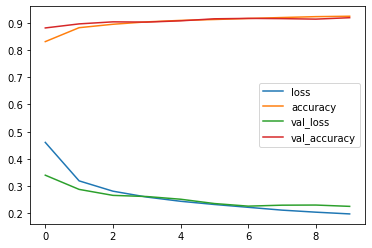

In [6]:
%%time
model_6.compile(optimizer=tf.optimizers.Adam(),
                loss=tf.losses.sparse_categorical_crossentropy,
                metrics = ['accuracy'])
history_6 = model_6.fit(train_images, train_labels, epochs=10,
            validation_data=(test_images, test_labels),verbose=2)
pd.DataFrame(history_6.history).plot()

## 使用data augmentation：

In [9]:
%%time

model_7 = keras.Sequential([
  #layers.Resizing(IMG_SIZE, IMG_SIZE),
  keras.layers.Rescaling(1./255, input_shape=(28,28, 1)), 
  keras.layers.RandomFlip("horizontal_and_vertical"),
  keras.layers.RandomRotation(0.2),
  keras.layers.Conv2D(64,(3,3),padding='same', activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.5),
  keras.layers.Conv2D(128,(3,3),padding='same',activation='relu'),
  keras.layers.MaxPooling2D(),
  keras.layers.Dropout(0.5),
  keras.layers.Flatten(),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dense(10, activation='softmax')
])

model_7.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28, 1)         0         
                                                                 
 random_flip (RandomFlip)    (None, 28, 28, 1)         0         
                                                                 
 random_rotation (RandomRota  (None, 28, 28, 1)        0         
 tion)                                                           
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 64)       

Epoch 1/10
1875/1875 - 8s - loss: 0.9908 - accuracy: 0.6341 - val_loss: 0.6288 - val_accuracy: 0.7678 - 8s/epoch - 4ms/step
Epoch 2/10
1875/1875 - 7s - loss: 0.7057 - accuracy: 0.7387 - val_loss: 0.5475 - val_accuracy: 0.7975 - 7s/epoch - 4ms/step
Epoch 3/10
1875/1875 - 7s - loss: 0.6408 - accuracy: 0.7637 - val_loss: 0.5381 - val_accuracy: 0.7990 - 7s/epoch - 4ms/step
Epoch 4/10
1875/1875 - 7s - loss: 0.6045 - accuracy: 0.7786 - val_loss: 0.5110 - val_accuracy: 0.8256 - 7s/epoch - 4ms/step
Epoch 5/10
1875/1875 - 7s - loss: 0.5780 - accuracy: 0.7879 - val_loss: 0.4788 - val_accuracy: 0.8323 - 7s/epoch - 4ms/step
Epoch 6/10
1875/1875 - 7s - loss: 0.5573 - accuracy: 0.7957 - val_loss: 0.4839 - val_accuracy: 0.8302 - 7s/epoch - 4ms/step
Epoch 7/10
1875/1875 - 7s - loss: 0.5423 - accuracy: 0.8008 - val_loss: 0.4871 - val_accuracy: 0.8227 - 7s/epoch - 4ms/step
Epoch 8/10
1875/1875 - 7s - loss: 0.5285 - accuracy: 0.8071 - val_loss: 0.4548 - val_accuracy: 0.8357 - 7s/epoch - 4ms/step
Epoch 9/

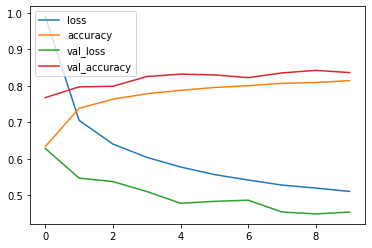

In [10]:
%%time
model_7.compile(optimizer=tf.optimizers.Adam(),
                loss=tf.losses.sparse_categorical_crossentropy,
                metrics = ['accuracy'])
history_7 = model_7.fit(train_images, train_labels, epochs=10,
            validation_data=(test_images, test_labels),verbose=2)
pd.DataFrame(history_7.history).plot()